# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
# Call API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + units

# Create lists to hold API data
lats = []
lngs = []
temps = []
hums = []
winds = []
clouds = []
countries = []
dates = []
city_count = []

# Create loop for request and response
counter = 0

for city in cities[:500]:
    query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + units
    print(city)
    response = requests.get(query_url)
    
    # Add responses to lists and continue if city is not found
    # Print counter and city - add sleep time between calls
    try:
        response = response.json()
        lngs.append(response['coord']['lon'])
        lats.append(response['coord']['lat'])
        temps.append(response['main']['temp_max'])
        hums.append(response['main']['humidity'])
        winds.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        dates.append(response['dt'])
        countries.append(response['sys']['country'])
        city_count.append(city)
        counter = counter +1
        print(f"{counter} || {city}")
        time.sleep(1)
    except:
        print("city not found")
    

joensuu
1 || joensuu
ushuaia
2 || ushuaia
taolanaro
city not found
yellowknife
3 || yellowknife
samusu
city not found
aykhal
4 || aykhal
albany
5 || albany
butaritari
6 || butaritari
busselton
7 || busselton
yirol
city not found
bandarbeyla
8 || bandarbeyla
mataura
9 || mataura
kruglolesskoye
10 || kruglolesskoye
nouadhibou
11 || nouadhibou
klaksvik
12 || klaksvik
atuona
13 || atuona
san carlos de bariloche
14 || san carlos de bariloche
sept-iles
15 || sept-iles
jamestown
16 || jamestown
isangel
17 || isangel
port alfred
18 || port alfred
rikitea
19 || rikitea
ilulissat
20 || ilulissat
hermanus
21 || hermanus
victoria
22 || victoria
chokurdakh
23 || chokurdakh
lagoa
24 || lagoa
verkhnyaya inta
25 || verkhnyaya inta
provideniya
26 || provideniya
brandon
27 || brandon
illoqqortoormiut
city not found
new norfolk
28 || new norfolk
esperance
29 || esperance
narsaq
30 || narsaq
namibe
31 || namibe
cape town
32 || cape town
palabuhanratu
city not found
longyearbyen
33 || longyearbyen
punta ar

mezhdurechensk
298 || mezhdurechensk
niamey
299 || niamey
sechura
300 || sechura
tiznit
301 || tiznit
clyde river
302 || clyde river
port keats
303 || port keats
launceston
304 || launceston
barawe
city not found
muli
305 || muli
villefontaine
306 || villefontaine
tessalit
307 || tessalit
rio gallegos
308 || rio gallegos
somerset
309 || somerset
margate
310 || margate
urengoy
311 || urengoy
vardo
312 || vardo
tuatapere
313 || tuatapere
ha tinh
314 || ha tinh
vestmanna
315 || vestmanna
saldanha
316 || saldanha
kodiak
317 || kodiak
miyako
318 || miyako
killybegs
319 || killybegs
kirillov
320 || kirillov
kidal
321 || kidal
tautira
322 || tautira
cidreira
323 || cidreira
ozgon
city not found
kruisfontein
324 || kruisfontein
thompson
325 || thompson
barranca
326 || barranca
amapa
327 || amapa
gurskoye
city not found
umzimvubu
city not found
barra
328 || barra
hambantota
329 || hambantota
banda aceh
330 || banda aceh
boituva
331 || boituva
antsohihy
332 || antsohihy
calama
333 || calama
aver

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Add lists to dictionary
weather_dict = {
     "City": city_count,
     "Lat": lats,
     "Lng": lngs,
     "Max Temp": temps,
     "Humidity": hums,
     "Cloudiness": clouds,
     "Wind Speed": winds,
     "Country": countries,
     "Date": dates
}

# Create DataFrame
city_weather = pd.DataFrame(data = weather_dict)
city_weather.head()


City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      joensuu  62.60   29.76      37.0        88          75        6.93   
1      ushuaia -54.80  -68.30      39.2        86          75       28.86   
2  yellowknife  62.46 -114.35      27.0        63          90       21.92   
3       aykhal  66.00  111.50      15.8        85          90        6.71   
4       albany  42.60  -73.97      68.0        75           8        3.00   

  Country        Date  
0      FI  1602806136  
1      AR  1602806137  
2      CA  1602806139  
3      RU  1602806140  
4      US  1602805843

In [28]:
# Save city_weather to csv file
city_weather.to_csv("city_weather.csv")

#verify path
!pwd

/c/classrepo/HomeWork_out/PythonAPI_HW/python-api-challenge/WeatherPy


In [29]:
# Not required - stats
city_weather.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  460.000000  460.000000  460.000000  460.000000  460.000000  460.000000   
mean    18.906283   20.902196   61.536761   72.578261   53.858696    8.409174   
std     34.207218   91.852773   18.659553   21.177236   37.595827    5.614811   
min    -54.800000 -179.170000    4.800000    1.000000    0.000000    0.290000   
25%     -8.862500  -63.577500   46.990000   63.000000   20.000000    4.000000   
50%     20.595000   27.630000   64.610000   78.000000   63.000000    6.930000   
75%     49.397500  103.290000   77.632500   88.000000   90.000000   11.410000   
max     78.220000  179.320000   93.990000  100.000000  100.000000   28.860000   

               Date  
count  4.600000e+02  
mean   1.602806e+09  
std    1.729813e+02  
min    1.602806e+09  
25%    1.602806e+09  
50%    1.602806e+09  
75%    1.602807e+09  
max    1.602807e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
# Get the indices of cities that have humidity over 100%.
max_humidity = city_weather[city_weather["Humidity"] > 100].index

# Droup cities with humidity > 100 creating a new DataFrame
clean_city_weather = city_weather.drop(max_humidity, inplace=False)
clean_city_weather

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0        joensuu  62.60   29.76     37.00        88          75        6.93   
1        ushuaia -54.80  -68.30     39.20        86          75       28.86   
2    yellowknife  62.46 -114.35     27.00        63          90       21.92   
3         aykhal  66.00  111.50     15.80        85          90        6.71   
4         albany  42.60  -73.97     68.00        75           8        3.00   
..           ...    ...     ...       ...       ...         ...         ...   
455   port blair  11.67   92.75     80.65        83         100       10.76   
456    kortkeros  61.81   51.58     30.20       100          90        6.71   
457   tarbagatay  51.48  107.36     26.60        92          90        3.89   
458     ucluelet  48.93 -125.55     54.00        81          90        8.05   
459   pekalongan  -6.89  109.68     64.00        79          94        4.16   

    Country        Date  
0        FI  1602806136  
1        AR  1602806137  
2        CA  1602806139  
3        RU  1602806140  
4        US  1602805843  
..      ...         ...  
455      IN  1602806690  
456      RU  1602806692  
457      RU  1602806693  
458      CA  1602806598  
459      ID  1602806695  

[460 rows x 9 columns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [31]:
# Scatter plot of latitude vs max tempurature
def latitude_plots(compare):
    plt.scatter(clean_city_weather["Lat"], clean_city_weather[compare], marker="o")
    
    # Graph properties
    plt.title(f"City Latitude vs {compare} (10/13/2020)")
    plt.ylabel(compare)
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save figure
    plt.savefig(f"Lat_vs_{compare}.png")

    # Display
    plt.show()

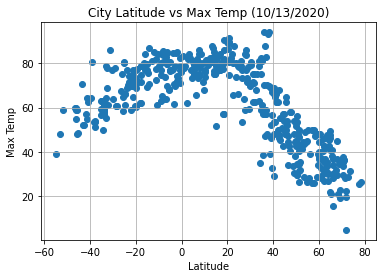

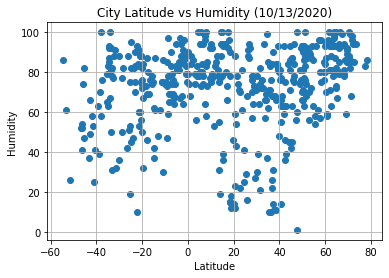

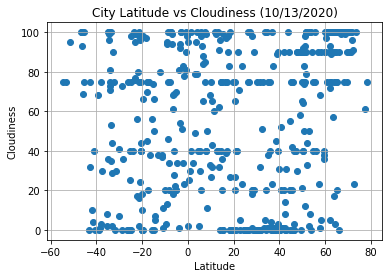

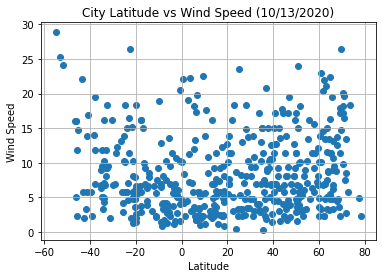

In [32]:
compare_list = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
for compare in compare_list:
    latitude_plots(compare)

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.85x +90.69
The r-value is: 0.7430778674947767


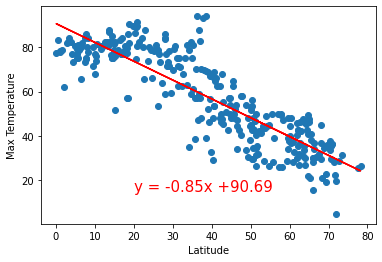

In [33]:
# Separate out northern hemisphere
northern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.85x +90.69
The r-value is: 0.7430778674947767


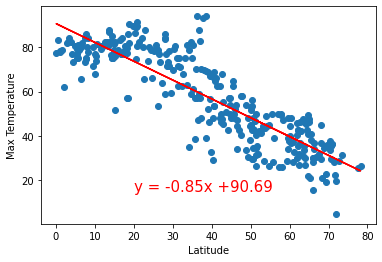

In [34]:
# Separate out southern hemisphere
southern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.23x +64.65
The r-value is: 0.04653531284136748


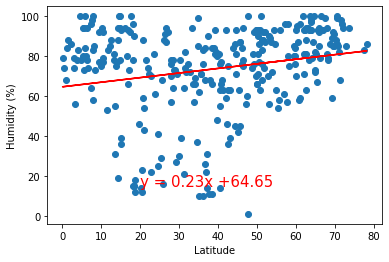

In [35]:
# Separate out northern hemisphere
northern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.23x +64.65
The r-value is: 0.04653531284136748


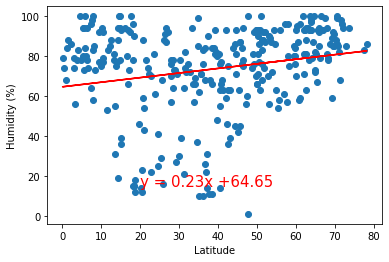

In [36]:
# Separate out southern hemisphere
southern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.5x +34.76
The r-value is: 0.07330033658507508


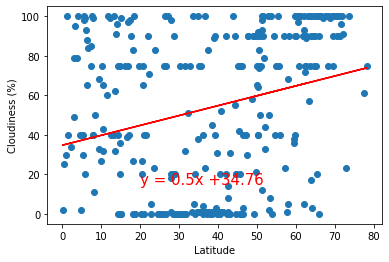

In [37]:
# Separate out northern hemisphere
northern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.5x +34.76
The r-value is: 0.07330033658507508


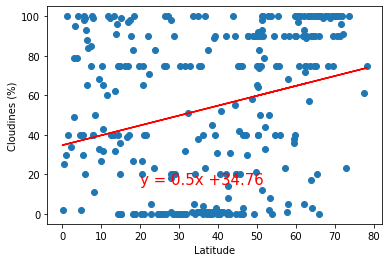

In [38]:
# Separate out southern hemisphere
southern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudines (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.05x +6.65
The r-value is: 0.03218449465765224


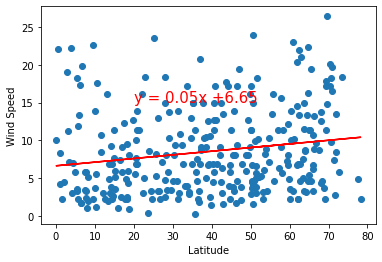

In [39]:
# Separate out northern hemisphere
northern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.05x +6.65
The r-value is: 0.03218449465765224


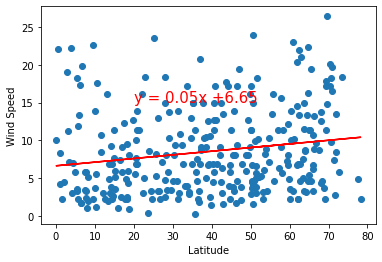

In [40]:
# Separate out southern hemisphere
southern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()